In [30]:
import cmath, math
import matplotlib
import pandas as pd

#x is the approximate
def absError(x,y):
    return abs(x - y)

def Dplus(u,x,h):
    return (u(x + h) - u(x))/h

def Dminus(u,x,h):
    return (u(x) - u(x-h))/h

def Dzero(u,x,h):
    return .5 * (Dplus(u,x,h) + Dminus(u,x,h))

def Dthree(u,x,h):
    return (1/(6 * h)) * (2 * u(x + h) + 3 * u(x) - 6 * u(x-h) + u(x - 2 * h))



# Homework 1

In [31]:
hlist = [.1,.05,.01,.001,.0001]
DplusR = []
DminusR = []
DzeroR = []
DthreeR = []
a = 2
exact = math.cos(a)

for h in hlist:

    DplusR.append(absError(Dplus(lambda x : math.sin(x), a, h),exact))
    DminusR.append(absError(Dminus(lambda x : math.sin(x), a, h),exact))
    DzeroR.append(absError(Dzero(lambda x : math.sin(x), a, h),exact))
    DthreeR.append(absError(Dthree(lambda x : math.sin(x), a, h),exact))


In [42]:
df = pd.DataFrame(data = [DplusR,DminusR,DzeroR,DthreeR])
df = df.T
df.columns = ['DplusR','DminusR','DzerR', 'DthreeR']
df.index = hlist

In [43]:
df

,DplusR,DminusR,DzerR,DthreeR
0.1000,0.044734,0.046120,6.932314e-04,7.703409e-05
0.0500,0.022554,0.022901,1.733728e-04,9.554574e-06
0.0100,0.004540,0.004553,6.935746e-06,7.591224e-08
0.0010,0.000455,0.000455,6.935782e-08,7.574413e-11
0.0001,0.000045,0.000045,6.928061e-10,1.083245e-12


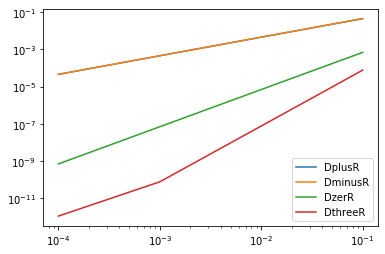

In [45]:
df.plot(logx = True,logy = True)